In [344]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('wvs.csv', sep='\t')

In [10]:
df.head()

,V2,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,MN_228S8,MN_229A,MN_230A,MN_233A,MN_237B1,MN_249A1,MN_249A3,I_RELIGBEL,I_NORM1,I_VOICE1
0,12,1,1,1,-2,1,1,2,1,1,...,3,-3,-3,-3,-3,1,1,0.0,1.0,0.00
1,12,1,2,3,4,2,2,2,2,2,...,3,-3,-3,-3,-3,2,-1,0.0,1.0,0.66
2,12,1,3,2,4,2,1,2,2,2,...,4,1,1,2,-3,1,1,0.0,1.0,0.33
3,12,1,1,3,4,3,1,2,1,2,...,2,2,1,2,-3,1,2,0.0,1.0,0.00
4,12,1,1,1,2,1,1,1,3,2,...,2,2,1,2,-3,1,2,0.0,1.0,0.66


## 1 Explore and clean the data

In [17]:
# Checking all V23 values with value less than 0
drop_index = df[df['V23']<0]['V23'].index

In [19]:
# Dropping index where V23 values with value less than 0
df.drop(index=drop_index, inplace=True)

In [21]:
# Resetting index
df.reset_index(drop=True, inplace=True)

In [24]:
# Checking Null Values
df['V23'].isna().sum()

0

In [39]:
# Value counts of each satisfaction level. 
print(df['V23'].value_counts())
v23_6 = df[df['V23']>=6]['V23'].value_counts()

8     18213
7     15493
10    11928
5     11331
6     10666
9      9264
4      4600
3      3463
1      2828
2      1985
Name: V23, dtype: int64


In [58]:
print("Mean satisfaction level: ",df['V23'].mean())
print("Proportion of V23 values greater than 6:",v23_6.sum()/len(df))

Mean satisfaction level:  6.8290316471911865
Proportion of V23 values greater than 6: 0.7303472168072095


## 2 Create the Design Matrix

##### Firstly let's decide the variables to input, and remove the missing variables. The last stage would be creating the Y matrix. 


In [246]:
df_mod = df.copy()

In [247]:
len(df_mod)

89771

In [248]:
# Checking columns with the least missing values
missing_df = pd.DataFrame(df_mod.lt(0).sum())
print(missing_df.index)
missing_df.reset_index(inplace=True)
missing_df.reset_index(drop=True, inplace=True)
missing_df = missing_df.sort_values(by=0)
print('\n')
print(missing_df)

Index(['V2', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       ...
       'MN_228S8', 'MN_229A', 'MN_230A', 'MN_233A', 'MN_237B1', 'MN_249A1',
       'MN_249A3', 'I_RELIGBEL', 'I_NORM1', 'I_VOICE1'],
      dtype='object', length=328)


          index      0
0            V2      0
325  I_RELIGBEL      0
299       V258A      0
326     I_NORM1      0
20          V23      0
..          ...    ...
135     V125_11  88697
137     V125_13  88712
250     V215_15  88720
127     V125_02  88986
55       V56_NZ  88999

[328 rows x 2 columns]


In [249]:
df_new = df_mod[['V23','V80','V2','V4','V22','V13','V14','V16','V18','V17','V12','V44','V20','V15','V19','V21','V240','V242','V57','V11','V5','V59','V10','V25', 'V6','V248','V84','V26','V27','V32','V30','V34','V200','V9','V55','V33','V188', 'V82', 'V102', 'V208', 'V209', 'V210', 'V179', 'V211', 'V8']]

In [250]:
df_final = df_new[(df_new[['V23', 'V80', 'V2', 'V4', 'V22', 'V13', 'V14', 'V16', 'V18', 'V17','V12', 'V44', 'V20', 'V15', 'V19', 'V21', 'V240', 'V242', 'V57', 'V11','V5', 'V59', 'V10', 'V25', 'V6', 'V248', 'V84', 'V26', 'V27', 'V32','V30', 'V34', 'V200', 'V9', 'V55', 'V33', 'V188', 'V82', 'V102', 'V208','V209', 'V210', 'V179', 'V211', 'V8']] != 0).all(axis=1)]

In [251]:
df_final.reset_index(drop=True, inplace=True)

In [270]:
var_v80 = (df_final[['V80']])
var_v80.rename(columns={'V80':'Problems'}, inplace=True)

In [280]:
var_v80.columns

Int64Index([-1, 1, 2, 3, 4, 5], dtype='int64')

In [282]:
var_v80.drop(columns=var_v80.columns[0],inplace=True)

In [283]:
var_v2.rename(columns={'V2':'Country'}, inplace=True)

/Users/saransharora/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [284]:
var_v2 = df_final['V2']
var_v2 = pd.get_dummies(df_final['V2'])
# Dropping one column
var_v2.drop(columns=var_v2.columns[0], inplace=True)

In [285]:
# Dropping columns V80 and V2 from df_final
df_final.drop(columns=['V80','V2'], inplace=True)

/Users/saransharora/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [286]:
data = pd.concat([df_final,var_v80, var_v2], axis=1, sort=False)

In [287]:
Y = data['V23']
data_X = data.drop(columns=['V23'])

In [288]:
print("The final two dataframes are now Y and data_X")

The final two dataframes are now Y and data_X


## 3 Condition numbers

In [317]:
list_columns = []
cond = []
i_val = []
for i in range(len(data_X.columns)):
    list_columns.append(data_X.columns[i])
    dat = data_X[list_columns]
    a = dat.values
    a = a.reshape(-1,len(dat.columns))
    print(a.shape)
    print("Adding Variable :",data_X.columns[i],",", i, "columns,", "k = ",np.linalg.cond(a))
    i_val.append(i)
    cond.append(np.linalg.cond(a))
    
    

(4231, 1)
Adding Variable : V4 , 0 columns, k =  1.0
(4231, 2)
Adding Variable : V22 , 1 columns, k =  4.433756879201765
(4231, 3)
Adding Variable : V13 , 2 columns, k =  5.350764399127095
(4231, 4)
Adding Variable : V14 , 3 columns, k =  6.1865243142415665
(4231, 5)
Adding Variable : V16 , 4 columns, k =  7.120869480720606
(4231, 6)
Adding Variable : V18 , 5 columns, k =  8.107501437947478
(4231, 7)
Adding Variable : V17 , 6 columns, k =  8.989703876341956
(4231, 8)
Adding Variable : V12 , 7 columns, k =  9.657491664192227
(4231, 9)
Adding Variable : V44 , 8 columns, k =  10.750662744852532
(4231, 10)
Adding Variable : V20 , 9 columns, k =  11.51204508562216
(4231, 11)
Adding Variable : V15 , 10 columns, k =  12.550246574983666
(4231, 12)
Adding Variable : V19 , 11 columns, k =  13.145671814159368
(4231, 13)
Adding Variable : V21 , 12 columns, k =  13.743742489604339
(4231, 14)
Adding Variable : V240 , 13 columns, k =  14.221665736886619
(4231, 15)
Adding Variable : V242 , 14 columns,

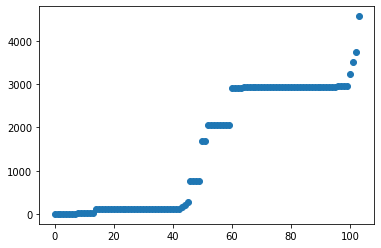

In [318]:
plt.scatter(i_val, cond)

## 4 Do Some Social Science

In [324]:
life_satis = Y
health = data_X['V11']
control_life = data_X['V55']
financial_sit = data_X['V59']

In [ ]:
# Run a linear regression models explaining satisfaction with these three variables. Present the output table

In [417]:
# Life Satisfaction vs Health
model = sm.OLS(life_satis, health)
results = model.fit()
print(results.conf_int())
print(results.summary())

            0        1
V11  2.890649  3.00755
                                 OLS Regression Results                                
Dep. Variable:                    V23   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                              9785.
Date:                Fri, 06 Mar 2020   Prob (F-statistic):                        0.00
Time:                        22:37:54   Log-Likelihood:                         -11879.
No. Observations:                4231   AIC:                                  2.376e+04
Df Residuals:                    4230   BIC:                                  2.377e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.

In [418]:
# # Life Satisfaction vs Control over Life
model = sm.OLS(life_satis, control_life)
results = model.fit()
print(results.conf_int())
print(results.summary())

            0        1
V55  0.903195  0.92458
                                 OLS Regression Results                                
Dep. Variable:                    V23   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                          2.808e+04
Date:                Fri, 06 Mar 2020   Prob (F-statistic):                        0.00
Time:                        22:37:57   Log-Likelihood:                         -10112.
No. Observations:                4231   AIC:                                  2.023e+04
Df Residuals:                    4230   BIC:                                  2.023e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.

In [419]:
# Life Satisfaction vs Financial Situation
model = sm.OLS(life_satis, financial_sit)
results = model.fit()
print(results.conf_int())
print(results.summary())

            0         1
V59  0.993548  1.016787
                                 OLS Regression Results                                
Dep. Variable:                    V23   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                          2.876e+04
Date:                Fri, 06 Mar 2020   Prob (F-statistic):                        0.00
Time:                        22:37:59   Log-Likelihood:                         -10068.
No. Observations:                4231   AIC:                                  2.014e+04
Df Residuals:                    4230   BIC:                                  2.014e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      

In [415]:
# Combining Target and response variable in one dataframe
data_comb = pd.concat([data_X,Y], axis=1, sort=False)

In [423]:
# Comment the output table in terms of relative effect size and statistical significance. Any surprises for you?

print("""The Adjusted R-squared is high for Control over Life and Financial Sitution, however, it is not that high for Health. This is surprising for me!""")

The Adjusted R-squared is high for Control over Life and Financial Sitution, however, it is not that high for Health. This is surprising for me!


In [363]:
# Compute and present RMSE (just on training data). This will serve as the benchmark for the future.
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(data_X, Y, test_size=0.2)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)  

In [364]:
print(rmse(y_test,predictions))

1.808979329478717


## 5 Back to ML: Model

In [356]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [362]:
print("Condition number for the design matrix :",np.linalg.cond(data_X))

Condition number for the design matrix : 4570.048578305534


In [365]:
#Split the data into training-validation chunks
X_train, X_test, y_train, y_test = train_test_split(data_X, Y, test_size=0.2)

In [366]:
#Condition number for training matrix
print("Condition number for the training matrix :",np.linalg.cond(X_train))

Condition number for the training matrix : 4363.237904980998


In [369]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [375]:
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 6.931676141926805e-16
RMSE for testing dataset : 0.053109902402489056


### Playing around with Ridge

In [376]:
r = Ridge(alpha=0.1)
model = r.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 7.083905303695739e-16
RMSE for testing dataset : 0.05592713793922389


In [377]:
r = Ridge(alpha=1)
model = r.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 5.398885961356848e-16
RMSE for testing dataset : 0.06183164068660839


In [378]:
r = Ridge(alpha=2)
model = r.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 2.816239492725279e-16
RMSE for testing dataset : 0.06380290575213357


In [379]:
r = Ridge(alpha=3)
model = r.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 2.5668986243106456e-16
RMSE for testing dataset : 0.06496620112821755


In [380]:
r = Ridge(alpha=5)
model = r.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 5.729590692096257e-16
RMSE for testing dataset : 0.06632061005160704


In [381]:
r = Ridge(alpha=0.01)
model = r.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 7.160019884580206e-16
RMSE for testing dataset : 0.05349439644468733


In [382]:
r = Ridge(alpha=0.001)
model = r.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 6.133785362999978e-16
RMSE for testing dataset : 0.053149849277220156


#### Best RMSE for testing dataset in Ridge Regression was given by alpha = 0.001

### Playing around with Lasso

In [383]:
l = Lasso(alpha=0.1)
model = l.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 6.561601800385086e-18
RMSE for testing dataset : 0.04124973926727658


In [384]:
l = Lasso(alpha=0.01)
model = l.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 4.7164793741168e-16
RMSE for testing dataset : 0.06868282811297564


In [385]:
l = Lasso(alpha=0.001)
model = l.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 7.942162819186108e-16
RMSE for testing dataset : 0.06589658582543637


In [386]:
l = Lasso(alpha=1)
model = l.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 2.131208264765076e-16
RMSE for testing dataset : 0.012498738963368871


In [387]:
l = Lasso(alpha=2)
model = l.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 3.286050181632851e-16
RMSE for testing dataset : 0.031073969439813984


## 6 Overfit!

In [391]:
X = data_X.sample(n = 1000)
Y = Y.sample(n=1000)

In [392]:
#Split the data into training-validation chunks
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [393]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("RMSE for training dataset :",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
print("RMSE for testing dataset :",(np.sqrt(np.mean(y_test-y_pred)**2)))

RMSE for training dataset : 9.2148511043888e-16
RMSE for testing dataset : 0.446211160711661


In [409]:
def ridge(alpha):   
    r = Ridge(alpha=alpha)
    model = r.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("RMSE for Ridge training dataset with alpha :",alpha,"=",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
    print("RMSE for Ridge testing dataset with alpha :",alpha,"=",(np.sqrt(np.mean(y_test-y_pred)**2)))

In [410]:
def lasso(alpha):
    l = Lasso(alpha=alpha)
    model = l.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("RMSE for Lasso training dataset with alpha :",alpha,"=",(np.sqrt(np.mean(y_train-y_train_pred)**2)))
    print("RMSE for Lasso testing dataset with alpha :",alpha,"=",(np.sqrt(np.mean(y_test-y_pred)**2)))

In [411]:
ridge(0.01)
ridge(0.1)
ridge(1)
ridge(2)
ridge(5)

RMSE for Ridge training dataset with alpha : 0.01 = 2.1094237467877973e-16
RMSE for Ridge testing dataset with alpha : 0.01 = 0.44584737029791927
RMSE for Ridge training dataset with alpha : 0.1 = 5.218048215738236e-16
RMSE for Ridge testing dataset with alpha : 0.1 = 0.44274295623717924
RMSE for Ridge training dataset with alpha : 1 = 5.750955267558311e-16
RMSE for Ridge testing dataset with alpha : 1 = 0.42191845794732763
RMSE for Ridge training dataset with alpha : 2 = 7.93809462606987e-16
RMSE for Ridge testing dataset with alpha : 2 = 0.40862498663795116
RMSE for Ridge training dataset with alpha : 5 = 8.726352973553731e-16
RMSE for Ridge testing dataset with alpha : 5 = 0.3873574487811883


In [413]:
lasso(0.001)
lasso(0.01)
lasso(0.1)
lasso(1)
lasso(2)

RMSE for Lasso training dataset with alpha : 0.001 = 8.43769498715119e-17
RMSE for Lasso testing dataset with alpha : 0.001 = 0.42154538101901695
RMSE for Lasso training dataset with alpha : 0.01 = 8.315570454442423e-16
RMSE for Lasso testing dataset with alpha : 0.01 = 0.37046864074340713
RMSE for Lasso training dataset with alpha : 0.1 = 4.773959005888173e-17
RMSE for Lasso testing dataset with alpha : 0.1 = 0.38225491107281434
RMSE for Lasso training dataset with alpha : 1 = 7.09432512735475e-16
RMSE for Lasso testing dataset with alpha : 1 = 0.3812500000000009
RMSE for Lasso training dataset with alpha : 2 = 7.09432512735475e-16
RMSE for Lasso testing dataset with alpha : 2 = 0.3812500000000009


##### The RMSE values for training data for OLS, Ridge and Lasso dataset are almost the same with very less difference. It is also very very low, which means that the data is highly overfit and has a lot of variance. 
##### The RMSE values for testing data for OLS, Ridge and Lasso  vary, with the lasso regression RMSE being the lowest with an alpha value of 0.01. 

In [414]:
print("The condition number for testing dataset: ", np.linalg.cond(X_test))

The condition number for testing dataset:  inf


##### The dataset has a very high variance, and will not perform good if the variable testing dataset is applied on the model. 